# 車のボディタイプの識別

## モデル概要
車のボディタイプを6クラス(軽自動車、ミニバン、セダン、スポーツカー、SUV、トラック)に分類する畳み込みニューラルネットワーク(CNN)をKerasを用いて作成し、検証を行いました。

## 参考にしたもの
本モデルを作成するにあたって、以下の書籍、記事を参考にしました。

- 書籍

     [PythonとKerasによるディープラーニング](https://www.amazon.co.jp/dp/4839964262/ref=as_sl_pc_tf_til?tag=ibkuroyagi-22&linkCode=w00&linkId=70e9d765352c9133eecd4718cdae86c6&creativeASIN=4839964262)


- 記事

    [KerasのCNNで、顔認識AIを作って見た〜スクレイピングからモデルまで〜](https://qiita.com/yottyann1221/items/a08300b572206075ee9f)
    
　　[GPUを使ってVGG16をFine Tuningして、顔認識AIを作って見た](https://qiita.com/yottyann1221/items/20a9c8a7a02edc7cd3d1)
  
 [2020決定版スーパーわかりやすい最適化アルゴリズム -損失関数からAdamとニュートン](https://qiita.com/omiita/items/1735c1d048fe5f611f80)
  　

## ライブラリのインポート

In [1]:
import os
import numpy as np
from keras import models
from keras.layers import Dense, Dropout
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\riuer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\riuer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\riuer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\riuer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## 学習データの準備
各クラス(軽自動車、ミニバン、セダン、スポーツカー、SUV、トラック)の訓練用画像をWebから取得しました。
<br>画像取得にはImage DownloderのAPIを用いました。

[Image Downloder](https://github.com/sczhengyabin/Image-Downloader)


##  データのクリーニング
6クラスのボディタイプの画像をそれぞれ500枚ずつ取得しました。
<br>その中で、以下のような画像を削除しました。

- 車が何台も映っている
- イラストの画像になっている
- 人間や文字など車以外のものが多く映っている
- ボディタイプが明らかに違う
- 車のドアが開いていたり、内装のみが映っている

不要なデータを削除し、6クラスで合計1238枚の画像を準備しました。

## 取得した画像をディレクトリに保存
ImageDownloderを用いて取得した各クラスの画像を、訓練データと検証データのディレクトリに保存ました。
<br> 訓練データ:検証データが約8:2になるように保存しました。
<br>datasetディレクトリのの中に、 **train：valid = 993：245 (枚)** のデータが保存されています。


In [6]:
import cv2
from os import listdir


#データセットのディレクトリ
base_dir = "./dataset/"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
#test_dir = os.path.join(base_dir,'test')

# 分類するクラス
classes = ["lightcar","minivan","sedan","sportscar","suv","truck"]
nb_classes = len(classes)

# 画像サイズ
IMAGE_SIZE = 150


#訓練データのディレクトリ

#軽自動車
train_lightcar_dir = os.path.join(train_dir,"lightcar")
train_lightcar_fnames = [os.path.join(train_lightcar_dir,fname) for fname in os.listdir(train_lightcar_dir)]
#ミニバン
train_minivan_dir = os.path.join(train_dir,"minivan")
train_minivan_fnames = [os.path.join(train_minivan_dir,fname) for fname in os.listdir(train_minivan_dir)]
#セダン
train_sedan_dir = os.path.join(train_dir,"sedan")
train_sedan_fnames = [os.path.join(train_sedan_dir,fname) for fname in os.listdir(train_sedan_dir)]
#スポーツカー
train_sportscar_dir = os.path.join(train_dir,"sportscar")
train_sportscar_fnames = [os.path.join(train_sportscar_dir,fname) for fname in os.listdir(train_sportscar_dir)]
#SUV
train_suv_dir = os.path.join(train_dir,"suv")
train_suv_fnames = [os.path.join(train_suv_dir,fname) for fname in os.listdir(train_suv_dir)]
#トラック
train_truck_dir = os.path.join(train_dir,"truck")
train_truck_fnames = [os.path.join(train_truck_dir,fname) for fname in os.listdir(train_truck_dir)]


#検証データのディレクトリ

#軽自動車
validation_lightcar_dir = os.path.join(validation_dir,"lightcar")
validation_lightcar_fnames = [os.path.join(validation_lightcar_dir,fname) for fname in os.listdir(validation_lightcar_dir)]
#ミニバン
validation_minivan_dir = os.path.join(validation_dir,"minivan")
validation_minivan_fnames = [os.path.join(validation_minivan_dir,fname) for fname in os.listdir(validation_minivan_dir)]
#セダン
validation_sedan_dir = os.path.join(validation_dir,"sedan")
validation_sedan_fnames = [os.path.join(validation_sedan_dir,fname) for fname in os.listdir(validation_sedan_dir)]
#スポーツカー
validation_sportscar_dir = os.path.join(validation_dir,"sportscar")
validation_sportscar_fnames = [os.path.join(validation_sportscar_dir,fname) for fname in os.listdir(validation_sportscar_dir)]
#SUV
validation_suv_dir = os.path.join(validation_dir,"suv")
validation_suv_fnames = [os.path.join(validation_suv_dir,fname) for fname in os.listdir(validation_suv_dir)]
#トラック
validation_truck_dir = os.path.join(validation_dir,"truck")
validation_truck_fnames = [os.path.join(validation_truck_dir,fname) for fname in os.listdir(validation_truck_dir)]


## データの確認
保存したデータの中身を確認しておきます。

訓練データの総数 : 993
検証データの総数 : 245



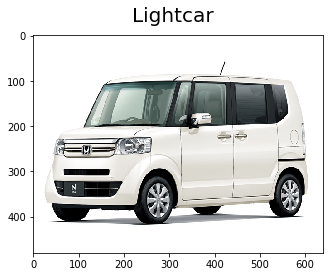

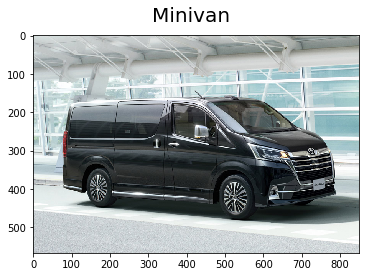

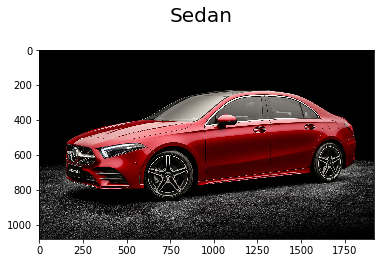

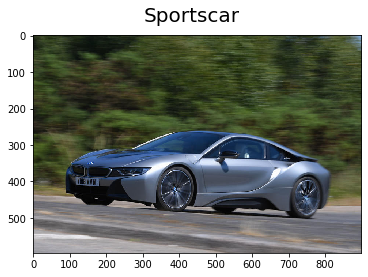

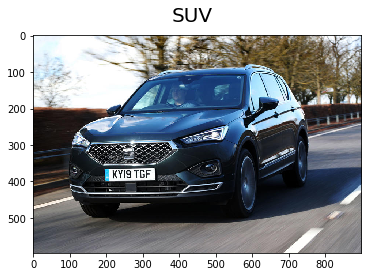

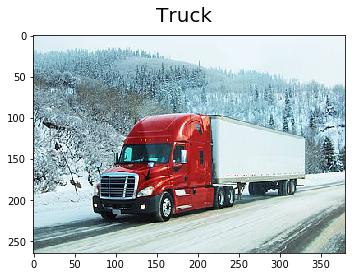

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image
import matplotlib.image as mpimg


#データの総数の確認
print("訓練データの総数 :",len(os.listdir(train_lightcar_dir)+os.listdir(train_minivan_dir)+os.listdir(train_sedan_dir)+os.listdir(train_sportscar_dir)+os.listdir(train_suv_dir)+os.listdir(train_truck_dir)))
print("検証データの総数 :",len(os.listdir(validation_lightcar_dir)+os.listdir(validation_minivan_dir)+os.listdir(validation_sedan_dir)+os.listdir(validation_sportscar_dir)+os.listdir(validation_suv_dir)+os.listdir(validation_truck_dir)))
print()

#各クラスのデータ例を表示
lightcar_img = mpimg.imread(train_lightcar_fnames[3])
plt.figure()
imgplot = plt.imshow(lightcar_img)
plt.suptitle("Lightcar", fontsize=20)

minivan_img = mpimg.imread(train_minivan_fnames[2])
plt.figure()
imgplot = plt.imshow(minivan_img)
plt.suptitle("Minivan", fontsize=20)

sedan_img = mpimg.imread(train_sedan_fnames[1])
plt.figure()
imgplot = plt.imshow(sedan_img)
plt.suptitle("Sedan", fontsize=20)

sportscar_img = mpimg.imread(train_sportscar_fnames[3])
plt.figure()
imgplot = plt.imshow(sportscar_img)
plt.suptitle("Sportscar", fontsize=20)

suv_img = mpimg.imread(train_suv_fnames[1])
plt.figure()
imgplot = plt.imshow(suv_img)
plt.suptitle("SUV", fontsize=20)

truck_img = mpimg.imread(train_truck_fnames[3])
plt.figure()
imgplot = plt.imshow(truck_img)
plt.suptitle("Truck", fontsize=20)

plt.show()


## データの水増し
訓練用データ6クラス合わせて993枚と少ないため過学習を防ぐために、訓練用データの水増しを行います。

#### ImageDataGeneratorを使ってデータの水増しを行います。
- rotation_range…画像をランダムに回転させる（範囲0～180）.
- width_shift_range, height_shift_range…画像を水平または垂直にランダムに平行移動させる範囲
- shear_range…等積変形をランダムに適応
- zoom_range…図形の内側をランダムにズーム
- horizontal_flip=True,…画像を水平方向にランダムに反転
- vertical_flip=True,…画像を垂直方向にランダムに反転
- fill_mode='nearest'…新たに作成されたピクセルを埋めるため

In [30]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')

#### 水増しした訓練画像をランダムに表示します。

./dataset/train\sedan\Google_0083.jpeg


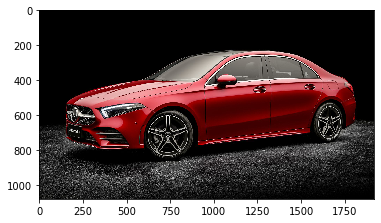

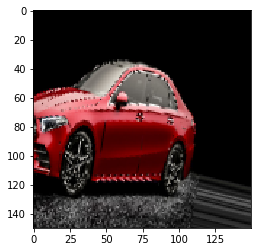

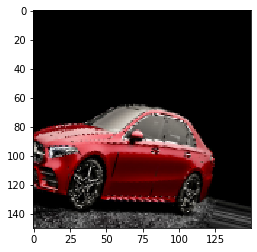

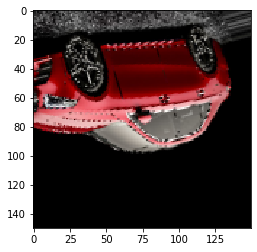

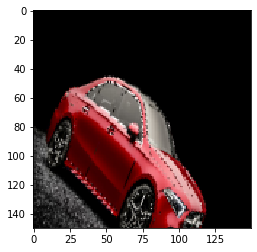

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image
import matplotlib.image as mpimg


# 水増しする画像を選択
image_path = train_sedan_fnames[1]
print(image_path)
# 元の画像を表示
img = mpimg.imread(image_path)
plt.figure()
imgplot = plt.imshow(img)
plt.show()
# 画像読み込み、サイズを変更
img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

# 形状が(1, 150, 150, 3)のNumpy配列に変形
x = image.img_to_array(img)

# (1, 150, 150, 3)に変形
x = x.reshape((1,) + x.shape)

# ランダムに変換した画像のバッチを生成する
# 無限ループとなるため、何らかのタイミングでbreakする必要あり
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

画像の水増しが成功していることを確認することができました。

## 転移学習モデルの作成

今回はImageNetのデータセットで広く用いられているVGG16を使用して、転移学習モデルを作成していきます。Imagenetのデータセットにはスポーツカー、ワゴン車、トラック、航空機なども含まれているため、今回のボディタイプの分類にも効果が期待できます。

#### VGG16モデルのベースのインスタンス化

In [32]:
from keras.applications import VGG16

# VGG16のロード
# weightsは重みのチェックポイント。include_topは全結合層を含めるかどうか。imagenetの1000クラス分類に対応。
conv_base = VGG16(weights = "imagenet",
                 include_top=False,
                 input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))

# モデルの構造を出力します
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## 特徴量を抽出するモデルを作成
畳み込みベースにミニバン、セダン等の抽象的な情報を抽出する分類器を追加します。
<br>活性化関数にはreluを用いています。
<br>

また、過学習を防ぐためにデータの水増しを行いましたが、さらに抑制するために全結合分類器の直前にDropout層を追加しています。入力ユニットをドロップする（0で上書きする）割合rate=0.3にしています。

In [33]:
# 特徴量抽出部分のモデルを作成
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# モデルの構造を出力します
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 16,813,638
Non-trainable params: 0
_________________________________________________________________


## ベースネットワークの凍結
vgg16による特徴抽出部分の重みは更新されると崩れてしまうので固定します。

損失関数は多クラス分類のためクロスエントロピーを用います。
<br>また、最適化アルゴリズムにはAdamを使用しています。

In [34]:
from keras.optimizers import Adam

# vgg16の重みの固定
for layer in conv_base.layers[:15]:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

# モデルの構造を出力します
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 9,178,374
Non-trainable params: 7,635,264
_________________________________________________________________


## モデルの学習
データの水増し設定を用いてモデルの学習をしていきます。

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')

#検証用データの水増しは行わない
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    classes = classes,
                                                    shuffle=True
                                                    
                                                   )

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                             target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                             color_mode='rgb',
                                                             batch_size=32,
                                                             class_mode='categorical',
                                                             classes = classes,
                                                             shuffle=True
                                                             )

print(train_generator.class_indices)#正解ラベルの確認
print(validation_generator.class_indices)#正解ラベルの確認
#conv_base.trainable = True

#今回は過学習の抑止、時間節約のためのEarlyStoppingは使用していない
#early_stopping =  EarlyStopping(monitor='val_loss',min_delta=0.01,patience=3)
history = model.fit_generator(train_generator,
                             steps_per_epoch=64,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=20,
                             )
#callbacks=[early_stopping]

Found 993 images belonging to 6 classes.
Found 245 images belonging to 6 classes.
{'lightcar': 0, 'minivan': 1, 'sedan': 2, 'sportscar': 3, 'suv': 4, 'truck': 5}
{'lightcar': 0, 'minivan': 1, 'sedan': 2, 'sportscar': 3, 'suv': 4, 'truck': 5}
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30


C:\Users\riuer\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


64/64 [==============================] - 344s 5s/step - loss: 1.6508 - acc: 0.3173 - val_loss: 1.2486 - val_acc: 0.4790
Epoch 2/30
64/64 [==============================] - 374s 6s/step - loss: 1.4478 - acc: 0.3879 - val_loss: 1.2026 - val_acc: 0.5091
Epoch 3/30
64/64 [==============================] - 463s 7s/step - loss: 1.2436 - acc: 0.4944 - val_loss: 1.0468 - val_acc: 0.5825
Epoch 4/30
64/64 [==============================] - 437s 7s/step - loss: 1.1801 - acc: 0.5081 - val_loss: 1.1667 - val_acc: 0.5750
Epoch 5/30
64/64 [==============================] - 489s 8s/step - loss: 1.1490 - acc: 0.5466 - val_loss: 1.2430 - val_acc: 0.5324
Epoch 6/30
64/64 [==============================] - 433s 7s/step - loss: 1.1075 - acc: 0.5828 - val_loss: 1.0954 - val_acc: 0.6013
Epoch 7/30
64/64 [==============================] - 463s 7s/step - loss: 0.9994 - acc: 0.6158 - val_loss: 1.1362 - val_acc: 0.5922
Epoch 8/30
64/64 [==============================] - 426s 7s/step - loss: 0.9802 - acc: 0.6192 

## 学習実行
エポック数：30
<br>学習時間:約4時間(GPUなし)


## モデルの保存
modelとhistoryをそれぞれ保存します。

In [41]:
#モデルの保存
model.save('Model_Car_bodytype_classifier.h5')

#historyの保存
import codecs,json

b = {}
for k,v in history.history.items():
    b.update({k: [float(v_) for v_ in v]})

with open('History_Car_bodytype_classifier.json', 'w') as f:
    json.dump(b, f)

## モデルの評価
訓練したモデルを正解率と損失値のグラフから評価します。

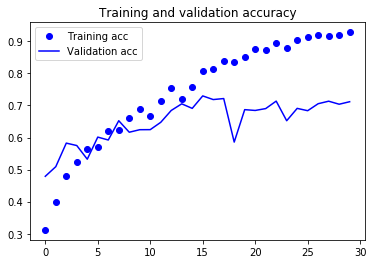

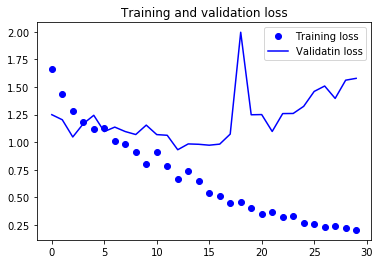

In [42]:
f = open('History_Car_bodytype_classifier.json', 'r')
history = json.load(f)
f.close()

acc = history["acc"]
val_acc = history["val_acc"]
loss = history["loss"]
val_loss = history["val_loss"]

epochs = range(len(acc))

#正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 結果に対する考察

- trainデータでの正解率は93%近くまで達しています。一方、varidデータでの正解率は約70%と過学習に陥っている傾向がみられます。このことは、trainデータのロスが0%付近まで減少している一方で、varidデータのロスは初期からで減少が止まっていることからもわかります。


- 過学習を抑制するために今回は、1.データの水増し、2.Dropout層の追加を行いました。<br>1.データの水増しについては元々のデータ数が少なかったために、水増しを行っても新しい情報を生み出せるわけではなく、過学習を完全に取り除くことが出来なかったのでないかと考えられます。また、データのクリーニングが不十分であった可能性も考えられます。

　　<br>　　2.Dropout層の追加については追加していないモデルに比べて明らかに学習率の改善が見られました。(学習率50％程度で頭打ちになってしまい、
 　　　　 <br>　　途中で打ち止めにしてしまったため、モデルの保存ができていません。)よって、過学習の抑制に効果があると考えられます。
  
- その他に考えられることとして、VGG16モデルでは畳み込み層がImageNetに対して最適化されていないので、今回のボディタイプの分類には最適化できていないことも原因だと考えられます。車の識別では製品ごとに特徴に大きな違いがあまりないことから、畳み込み層で特徴量の抽出した方が正確に学習してくれるかもしれません。


- また、最適化アルゴリズムには最初は、RMSPropを用いていましたが、Adamに変更することで正解率に改善が見られました。このようなハイパーパラメータによる違いもさらに調査していく必要があると考えます。さらに、今回はEarlyStopingを用いませんでしたが、過学習抑止の効果があるのかも試していきたいです。

## 今後
- 各クラスでの訓練データをさらに増やし、再度学習


- 今回の転移学習モデルの畳み込み層の一部を解凍し、ファインチューニングを行う。


- trainデータ、varidデータの他にどちらにも含まれていないtestデータを準備し、それぞれのモデルの精度を評価する。(今回はデータ数が少なかったため、varidデータとtestデータを同じものとして扱っています。)


- 他の学習済みモデル(ResNetなど)を用いてみる。


- CNN以外の深層学習モデルを自分なりに作成してみる(個人的にGANに挑戦してみたい)

## ファインチューニング

In [47]:
model = models.load_model('model/Model_Car_bodytype_classifier.h5') 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 9,178,374
Non-trainable params: 7,635,264
_________________________________________________________________


In [71]:
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.models import Model

model.trainable = True

set_trainable = False
for layer in model.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False     

#コンパイルをしないとsummaryをしても反映されないので注意
model.compile(optimizer=Adam(lr=1e-5),#学習率が低いのはファインチューニングを行う３つの層の変更を制限するため
             loss='categorical_crossentropy',
             metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [72]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=64,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=20,
                             )

Epoch 1/30
64/64 [==============================] - 574s 9s/step - loss: 1.3538 - acc: 0.4367 - val_loss: 1.1617 - val_acc: 0.5275
Epoch 2/30
64/64 [==============================] - 577s 9s/step - loss: 1.2372 - acc: 0.5161 - val_loss: 1.1556 - val_acc: 0.5420
Epoch 3/30
64/64 [==============================] - 614s 10s/step - loss: 1.1363 - acc: 0.5542 - val_loss: 1.0657 - val_acc: 0.6019
Epoch 4/30
64/64 [==============================] - 611s 10s/step - loss: 1.0661 - acc: 0.5945 - val_loss: 1.0221 - val_acc: 0.6112
Epoch 5/30
64/64 [==============================] - 613s 10s/step - loss: 1.0266 - acc: 0.6038 - val_loss: 1.1316 - val_acc: 0.5615
Epoch 6/30
64/64 [==============================] - 611s 10s/step - loss: 1.0365 - acc: 0.5879 - val_loss: 1.0528 - val_acc: 0.6096
Epoch 7/30
64/64 [==============================] - 621s 10s/step - loss: 0.8685 - acc: 0.6913 - val_loss: 1.0386 - val_acc: 0.5971
Epoch 8/30
64/64 [==============================] - 671s 10s/step - loss: 0.83

In [73]:
#モデルの保存
model.save('Model_Car_bodytype_classifier_2.h5')

#historyの保存
import codecs,json

b = {}
for k,v in history.history.items():
    b.update({k: [float(v_) for v_ in v]})

with open('History_Car_bodytype_classifier_2.json', 'w') as f:
    json.dump(b, f)

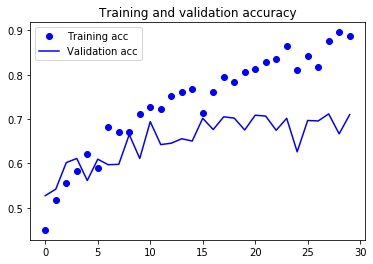

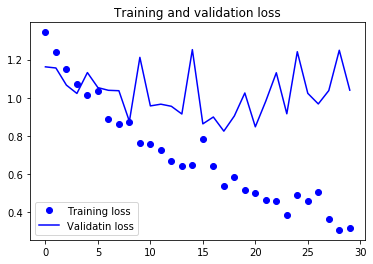

In [74]:
history = json.load(f)
f.close()

acc = history["acc"]
val_acc = history["val_acc"]
loss = history["loss"]
val_loss = history["val_loss"]

epochs = range(len(acc))

#正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## モデル全体を学習

In [95]:
# 特徴量抽出部分のモデルを作成
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(nb_classes, activation='softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=2e-4),
              metrics=['acc'])

# モデルの構造を出力します
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_11  (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 6150      
Total params: 15,246,150
Trainable params: 15,246,150
Non-trainable params: 0
_________________________________________________________________


In [97]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = conv_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation='softmax')(x)
model = Model(inputs=conv_base.input, outputs=predictions)
model.compile(optimizer=optimizers.Adam(lr=2e-5),
             loss='categorical_crossentropy',
             metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [98]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=64,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=20,
                             )

Epoch 1/30
64/64 [==============================] - 969s 15s/step - loss: 1.6097 - acc: 0.3087 - val_loss: 1.4051 - val_acc: 0.4530
Epoch 2/30
64/64 [==============================] - 1239s 19s/step - loss: 1.3576 - acc: 0.4575 - val_loss: 1.4678 - val_acc: 0.4223
Epoch 3/30
64/64 [==============================] - 1212s 19s/step - loss: 1.2486 - acc: 0.5215 - val_loss: 1.0338 - val_acc: 0.5964
Epoch 4/30
64/64 [==============================] - 4595s 72s/step - loss: 1.0398 - acc: 0.6107 - val_loss: 1.1813 - val_acc: 0.5534
Epoch 5/30
64/64 [==============================] - 1051s 16s/step - loss: 1.1350 - acc: 0.5657 - val_loss: 1.4601 - val_acc: 0.5058
Epoch 6/30
64/64 [==============================] - 1125s 18s/step - loss: 0.9246 - acc: 0.6348 - val_loss: 1.0552 - val_acc: 0.5858
Epoch 7/30
64/64 [==============================] - 1176s 18s/step - loss: 0.9146 - acc: 0.6544 - val_loss: 1.0104 - val_acc: 0.6310
Epoch 8/30
64/64 [==============================] - 1193s 19s/step - l

In [99]:
#モデルの保存
model.save('Model_Car_bodytype_classifier_3.h5')

#historyの保存
import codecs,json

b = {}
for k,v in history.history.items():
    b.update({k: [float(v_) for v_ in v]})

with open('History_Car_bodytype_classifier_3.json', 'w') as f:
    json.dump(b, f)

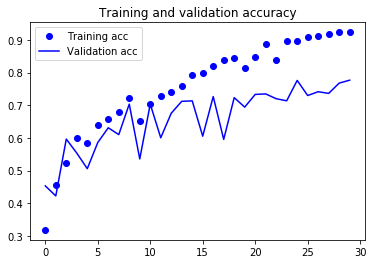

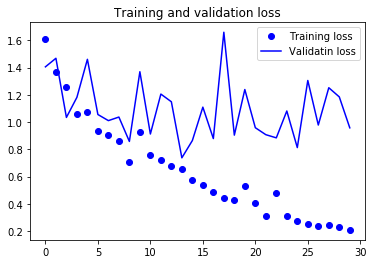

In [102]:
f = open('History_Car_bodytype_classifier_3.json', 'r')
history = json.load(f)
f.close()

acc = history["acc"]
val_acc = history["val_acc"]
loss = history["loss"]
val_loss = history["val_loss"]

epochs = range(len(acc))

#正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()